In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline
import seaborn as sns
import pickle

In [0]:
path = '/content/psd_labeled_data.pkl'
data = pickle.load(open(path, "rb"))

In [5]:
data['beat'][12]

[array([[38.76602059, 33.64471013, 32.99065041, 32.5182358 ],
        [40.87795429, 34.84469753, 28.23992583, 25.45515754],
        [37.0306689 , 31.38578592, 29.24121901, 28.79806225],
        [34.24693712, 28.27128243, 28.19285031, 28.39306888],
        [31.30611237, 23.98681128, 21.32271659, 20.48445029],
        [48.12897731, 40.83515457, 34.31696185, 29.8719244 ],
        [37.21254047, 32.26777879, 31.56832316, 31.49952075],
        [35.50986378, 29.98282079, 27.42564807, 26.77684143],
        [40.9529136 , 35.71958717, 31.84859711, 30.79562704]]), array([8, 7])]

In [0]:
stats = pd.read_csv('/content/stats.csv', sep=';')

In [12]:
stats

,trial,age,gender,gaming,vr_experience,beat_valence,beat_arousal,brook_valence,brook_arousal,nat_valence,nat_arousal
0,1,35,1,1,1,6,5,1,9,3,2
1,2,27,1,1,2,8,7,8,8,6,5
2,3,29,2,1,1,6,6,5,8,5,3
3,4,20,1,2,3,6,7,5,9,8,5
4,5,22,2,1,1,8,6,6,8,9,1
5,6,21,3,1,2,9,8,2,9,5,3
6,7,26,2,5,4,7,7,5,7,7,2
7,8,25,1,1,2,9,9,3,5,6,4
8,9,23,2,3,1,9,7,7,9,5,2
9,10,22,1,1,1,8,7,7,9,5,3


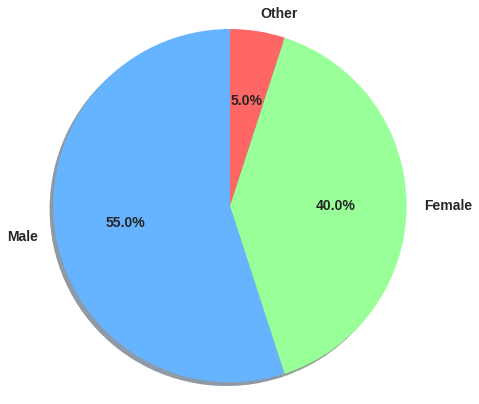

In [52]:
gender_labels = ['Male', 'Female', 'Other']
sizes = (stats['gender'].value_counts().values)/2
colors = ['#66b3ff', '#99ff99', '#ff6666']

fig1, ax1 = plt.subplots(figsize=(7,7))
ax1.pie(sizes, labels=gender_labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90, textprops={'fontsize': 14, 'fontweight':'bold'})
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [66]:
stats[['age', 'beat_valence', 'beat_arousal', 'brook_valence', 'brook_arousal', 'nat_valence','nat_arousal']].describe()[1:3]

,age,beat_valence,beat_arousal,brook_valence,brook_arousal,nat_valence,nat_arousal
mean,25.200000,7.600000,7.250000,4.70000,7.900000,6.250000,2.700000
std,4.274773,1.187656,1.069924,1.92217,1.372665,1.802776,1.260743


In [0]:
beat_V = stats.iloc[:,5].values
beat_A = stats.iloc[:,6].values
brook_V = stats.iloc[:,7].values
brook_A = stats.iloc[:,8].values
nat_V = stats.iloc[:,9].values
nat_A = stats.iloc[:,10].values

In [0]:
valence = np.concatenate((beat_V, brook_V, nat_V))
arousal = np.concatenate((beat_A, brook_A, nat_A))

game_dict = {1:'Beat Saber', 2:'The Brookhaven Experiment', 3:'Nature Treks VR'}
c = np.concatenate((np.ones(20), np.ones(20)*2, np.ones(20)*3))
game_labels = np.vectorize(game_dict.get)(c)

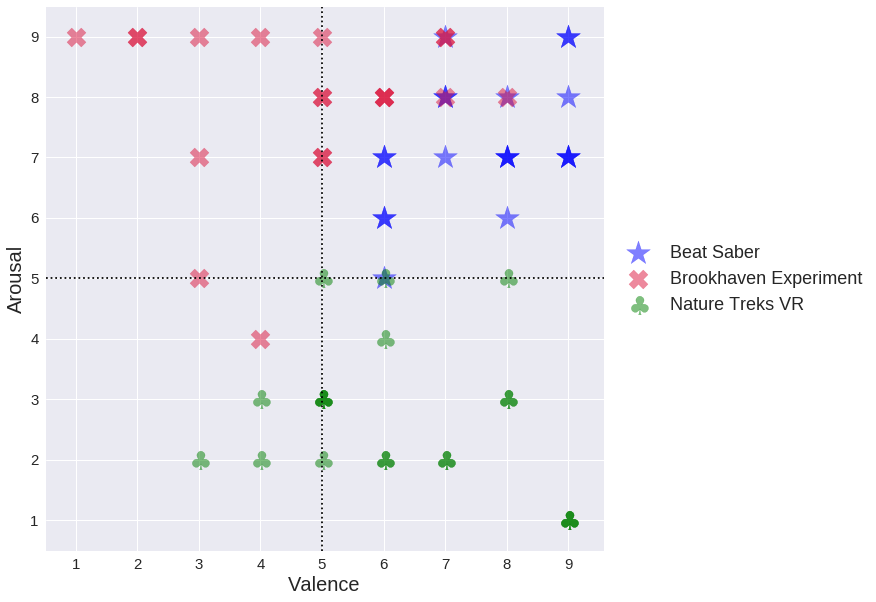

In [185]:
plt.figure(figsize=(10,10))
plt.axhline(y=5, color='black', linestyle=':')
plt.axvline(x=5, color='black', linestyle=':')
plt.scatter(beat_V, beat_A, s=25**2, c='Blue', marker='*',alpha=0.5, label='Beat Saber')
plt.scatter(brook_V, brook_A,s=19**2, c='Crimson', marker='X',alpha=0.5, label='Brookhaven Experiment')
plt.scatter(nat_V, nat_A, s=20**2, c='Green', marker=r'$\clubsuit$',alpha=0.5, label='Nature Treks VR')
plt.xlabel("Valence",size=20)
plt.ylabel("Arousal",size=20)
plt.xticks(range(1,10), size=15)
plt.yticks(range(1,10), size=15)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=18)
plt.show()

In [0]:

xx1, xx2 = np.meshgrid(np.arange(0.5, 9.5, 0.01),
                           np.arange(0.5, 9.5, 0.01))
x = np.array([xx1.ravel(), xx2.ravel()]).T

y = []
for [v,a] in x:
  if a>=5.5:
    if v>=5.5:
      y.append(0)
    else:
      y.append(1)
  else:
    y.append(2)
    
y=np.array(y).reshape(xx1.shape)

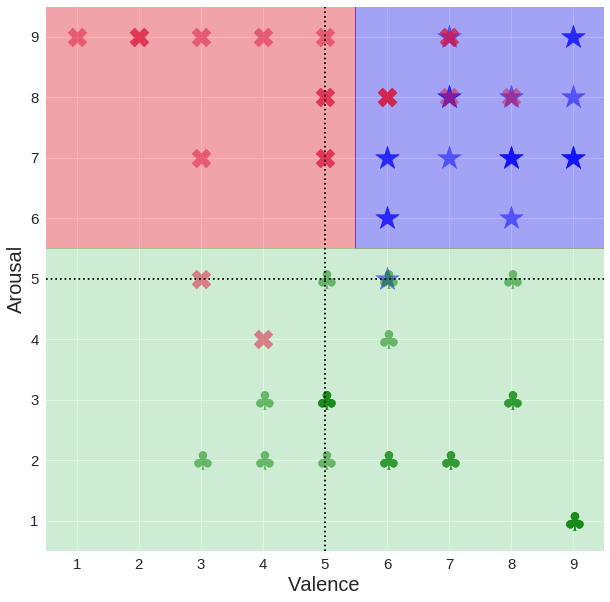

In [207]:
colors = ('blue', 'red', 'lightgreen')
cmap = ListedColormap(colors[:len(np.unique(y))])
plt.figure(figsize=(10,10))
plt.contourf(xx1,xx2, y, alpha=0.3,cmap=cmap )
plt.axhline(y=5, color='black', linestyle=':')
plt.axvline(x=5, color='black', linestyle=':')
plt.scatter(beat_V, beat_A, s=25**2, c='Blue', marker='*',alpha=0.5, label='Beat Saber')
plt.scatter(brook_V, brook_A,s=19**2, c='Crimson', marker='X',alpha=0.5, label='Brookhaven Experiment')
plt.scatter(nat_V, nat_A, s=20**2, c='Green', marker=r'$\clubsuit$',alpha=0.5, label='Nature Treks VR')
plt.xlabel("Valence",size=20)
plt.ylabel("Arousal",size=20)
plt.xticks(range(1,10), size=15)
plt.yticks(range(1,10), size=15)

plt.show()

1000000